In [24]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [25]:
file_data = r"E:\temp file\15009099\4FGL-DR4_v34_6classes_GMM_no_coord_features_weighted_prob_cat_v2.csv"
all_data_df = pd.read_csv(file_data)

In [26]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       7191 non-null   object 
 1   sin(GLAT)                  7191 non-null   float64
 2   cos(GLON)                  7191 non-null   float64
 3   sin(GLON)                  7191 non-null   float64
 4   log10(Energy_Flux100)      7191 non-null   float64
 5   log10(Unc_Energy_Flux100)  7191 non-null   float64
 6   log10(Signif_Avg)          7191 non-null   float64
 7   LP_index1000MeV            7191 non-null   float64
 8   LP_beta                    7191 non-null   float64
 9   LP_SigCurv                 7191 non-null   float64
 10  log10(Variability_Index)   7191 non-null   float64
 11  CLASS1                     7191 non-null   object 
 12  1_RF                       7191 non-null   float64
 13  1_RF_std                   7191 non-null   float

In [27]:
all_data_df.columns

Index(['name', 'sin(GLAT)', 'cos(GLON)', 'sin(GLON)', 'log10(Energy_Flux100)',
       'log10(Unc_Energy_Flux100)', 'log10(Signif_Avg)', 'LP_index1000MeV',
       'LP_beta', 'LP_SigCurv', 'log10(Variability_Index)', 'CLASS1', '1_RF',
       '1_RF_std', '1_NN', '1_NN_std', '2_RF', '2_RF_std', '2_NN', '2_NN_std',
       '3_RF', '3_RF_std', '3_NN', '3_NN_std', '4_RF', '4_RF_std', '4_NN',
       '4_NN_std', '5_RF', '5_RF_std', '5_NN', '5_NN_std', '6_RF', '6_RF_std',
       '6_NN', '6_NN_std', 'sample_weight'],
      dtype='object')

In [28]:
feature_columns = ['sin(GLAT)', 'cos(GLON)', 'sin(GLON)', 'log10(Energy_Flux100)', 'log10(Unc_Energy_Flux100)', 'log10(Signif_Avg)', 'LP_index1000MeV', 'LP_beta', 'LP_SigCurv', 'log10(Variability_Index)']
label = 'CLASS1'
data_columns = ['name', 'sin(GLAT)', 'cos(GLON)', 'sin(GLON)', 'log10(Energy_Flux100)', 'log10(Unc_Energy_Flux100)', 'log10(Signif_Avg)', 'LP_index1000MeV', 'LP_beta', 'LP_SigCurv', 'log10(Variability_Index)', 'CLASS1']
temp_df = all_data_df[feature_columns]
print(temp_df.shape)

(7191, 10)


In [29]:
class_counts = all_data_df[label].value_counts()
print(class_counts)
print(f'total classes: {class_counts.shape[0]}')

CLASS1
unas     2428
bcu      1625
bll      1490
fsrq      819
msp       179
unk       147
psr       141
spp       124
rdg        53
snr        45
glc        34
pwn        21
hmb        11
bin        10
lmb         9
sbg         8
agn         8
nlsy1       8
css         6
sfr         6
gal         6
nov         6
sey         4
ssrq        2
gc          1
Name: count, dtype: int64
total classes: 25


In [30]:
physical_classes = {'spp+': ['nov', 'spp'], 'fsrq+': ['fsrq', 'nlsy1'], 'psr+': ['snr', 'hmb', 'pwn', 'psr', 'gc'],
                    'msp+': ['msp', 'lmc', 'glc', 'gal', 'sfr', 'bin'], 'bcu+': ['sey', 'bcu', 'sbg', 'agn', 'rdg'], 'bll+': ['bll', 'ssrq', 'css']}

CLASS6 = {'spp+': 0, 'fsrq+': 1, 'psr+': 2, 'msp+': 3, 'bcu+': 4, 'bll+': 5}

In [31]:
copy_df = temp_df.copy()
copy_df.shape

(7191, 10)

In [32]:
# 创建CLASS1到CLASS6的映射函数
def map_class1_to_class6(class1_value):
    for class6_group, class1_list in physical_classes.items():
        if class1_value in class1_list:
            return CLASS6[class6_group]
    return -1  # 未匹配的类别标记为0

In [33]:
# 为所有样本应用标签映射
all_data_df['CLASS6'] = all_data_df['CLASS1'].apply(map_class1_to_class6)

In [34]:
class6_counts = all_data_df['CLASS6'].value_counts()
print(class6_counts)

CLASS6
-1    2584
 4    1698
 5    1498
 1     827
 3     235
 2     219
 0     130
Name: count, dtype: int64


In [35]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       7191 non-null   object 
 1   sin(GLAT)                  7191 non-null   float64
 2   cos(GLON)                  7191 non-null   float64
 3   sin(GLON)                  7191 non-null   float64
 4   log10(Energy_Flux100)      7191 non-null   float64
 5   log10(Unc_Energy_Flux100)  7191 non-null   float64
 6   log10(Signif_Avg)          7191 non-null   float64
 7   LP_index1000MeV            7191 non-null   float64
 8   LP_beta                    7191 non-null   float64
 9   LP_SigCurv                 7191 non-null   float64
 10  log10(Variability_Index)   7191 non-null   float64
 11  CLASS1                     7191 non-null   object 
 12  1_RF                       7191 non-null   float64
 13  1_RF_std                   7191 non-null   float

In [39]:
# 划分训练集和测试集
all_data = all_data_df[all_data_df['CLASS6'] != -1][['name'] + feature_columns + ['CLASS6']]
print(all_data.head())
X = all_data[feature_columns]
y = all_data['CLASS6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                name  sin(GLAT)  cos(GLON)  sin(GLON)  log10(Energy_Flux100)  \
3  4FGL J0001.2+4741  -0.247643  -0.410722   0.911761             -11.863557   
4  4FGL J0001.2-0747  -0.922572   0.016881   0.999857             -11.107484   
5  4FGL J0001.4-0010  -0.870281  -0.119998   0.992774             -11.881935   
6  4FGL J0001.5+2113  -0.645026  -0.303191   0.952930             -10.641685   
8  4FGL J0001.6-4156  -0.951210   0.900519  -0.434817             -11.486675   

   log10(Unc_Energy_Flux100)  log10(Signif_Avg)  LP_index1000MeV   LP_beta  \
3                 -12.491841           0.742244         1.997826  0.049796   
4                 -12.288400           1.389117         1.997502  0.037899   
5                 -12.508347           0.720296         2.139592 -0.010222   
6                 -12.195808           1.666760         2.865929  0.148902   
8                 -12.369896           1.254850         1.338169  0.120901   

   LP_SigCurv  log10(Variability_Index)  CLASS6  


In [40]:
print("数据集信息：")
print(f"样本总数：{len(X)}")
print(f"特征数：{X.shape[1]}")
print(f"类别数：{len(np.unique(y))}")
print(f"训练集大小：{len(X_train)}")
print(f"测试集大小：{len(X_test)}")

数据集信息：
样本总数：4607
特征数：10
类别数：6
训练集大小：3685
测试集大小：922


In [41]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # 多分类目标函数
    num_class=6,  # 类别数
    learning_rate=0.1,  # 学习率
    max_depth=3,  # 树的最大深度
    n_estimators=100,  # 树的数量
    random_state=42
)

# 训练模型
xgb_clf.fit(X_train, y_train, 
            eval_set=[(X_test, y_test)],  # 验证集
            verbose=False)

# 预测
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)  # 预测概率

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型评估结果：")
print(f"测试集准确率：{accuracy:.4f}")
print("\n分类报告：")
print(classification_report(y_test, y_pred, target_names=['spp+', 'fsrq+', 'psr+', 'msp+', 'bcu+', 'bll+']))

[0]	validation_0-mlogloss:1.67739
[1]	validation_0-mlogloss:1.58468
[2]	validation_0-mlogloss:1.50768
[3]	validation_0-mlogloss:1.44040
[4]	validation_0-mlogloss:1.38033
[5]	validation_0-mlogloss:1.32823
[6]	validation_0-mlogloss:1.28236
[7]	validation_0-mlogloss:1.24158
[8]	validation_0-mlogloss:1.20568
[9]	validation_0-mlogloss:1.17337
[10]	validation_0-mlogloss:1.14317
[11]	validation_0-mlogloss:1.11575
[12]	validation_0-mlogloss:1.09211
[13]	validation_0-mlogloss:1.06926
[14]	validation_0-mlogloss:1.04828
[15]	validation_0-mlogloss:1.02942
[16]	validation_0-mlogloss:1.01285
[17]	validation_0-mlogloss:0.99784
[18]	validation_0-mlogloss:0.98440
[19]	validation_0-mlogloss:0.97148
[20]	validation_0-mlogloss:0.95938
[21]	validation_0-mlogloss:0.94836
[22]	validation_0-mlogloss:0.93836
[23]	validation_0-mlogloss:0.92908
[24]	validation_0-mlogloss:0.92042
[25]	validation_0-mlogloss:0.91303
[26]	validation_0-mlogloss:0.90542
[27]	validation_0-mlogloss:0.89786
[28]	validation_0-mlogloss:0.8

In [42]:
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

[0.06778096 0.04113944 0.02496976 0.05169498 0.1437074  0.15757093
 0.21700837 0.12297504 0.0644989  0.10865417]


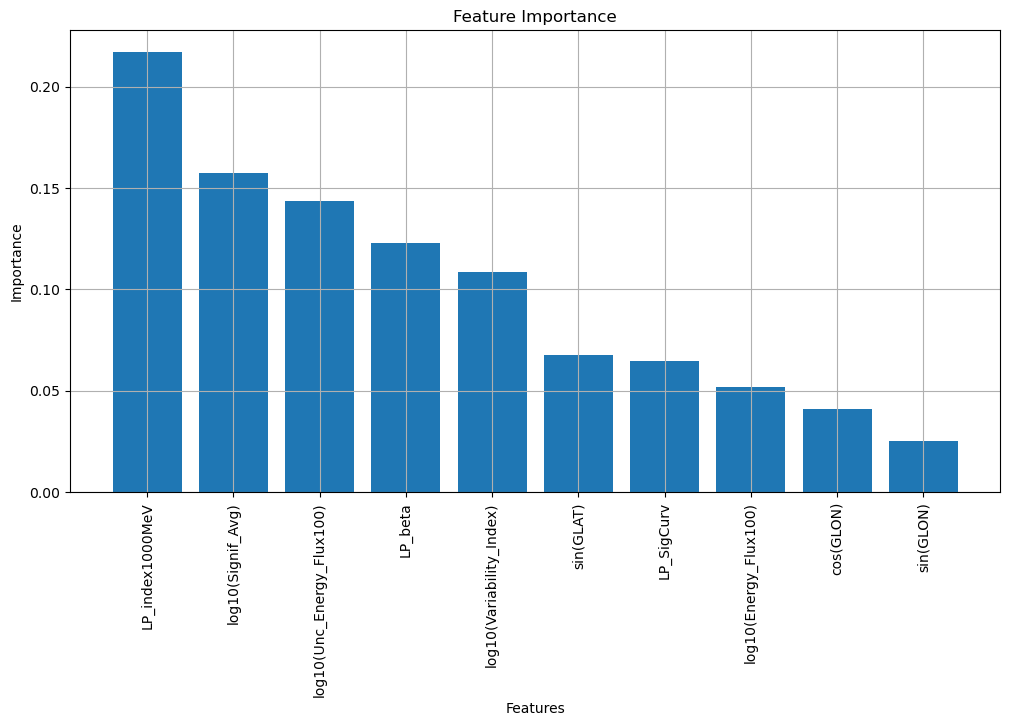

In [46]:
# 特征重要性
feature_importances = xgb_clf.feature_importances_
print(feature_importances)
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(feature_columns)[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.title('Feature Importance')
plt.show()

## 超参数调优

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# 定义参数网格
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和得分
print(f"\n网格搜索结果：")
print(f"最佳参数：{grid_search.best_params_}")
print(f"最佳得分：{grid_search.best_score_:.4f}")
print(f"最佳模型：{grid_search.best_estimator_}")

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits

网格搜索结果：
最佳参数：{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.6}
最佳得分（-MSE）：0.6931
最佳模型：XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=6, ...)


In [60]:
# 使用最佳参数重新训练模型
best_model = grid_search.best_estimator_
print(best_model)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=6, ...)


,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
# 评估模型
y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"\n模型评估结果：")
print(f"测试集准确率：{accuracy:.4f}")
print("\n分类报告：")
print(classification_report(y_test, y_pred_best, target_names=['spp+', 'fsrq+', 'psr+', 'msp+', 'bcu+', 'bll+']))


模型评估结果：
测试集准确率：0.6757

分类报告：
              precision    recall  f1-score   support

        spp+       0.50      0.35      0.41        23
       fsrq+       0.63      0.62      0.62       156
        psr+       0.76      0.71      0.73        41
        msp+       0.80      0.68      0.73        53
        bcu+       0.63      0.65      0.64       349
        bll+       0.74      0.76      0.75       300

    accuracy                           0.68       922
   macro avg       0.68      0.63      0.65       922
weighted avg       0.68      0.68      0.67       922

